
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Course Project <br>
</div>


---



In [ ]:
import numpy as np
import cv2

[link text](https:// [link text](https://))## Section 1: Finding the Objects

In this part, we are going to implement functions to find and indicate samples of `template.png` in `input.jpg`. We will use correlation based methods to achieve this. You can see chapter 13.3 of the course reference for more information on how to do this. As a brief summary, there are four methods you can consider:


1.   **Cross Correlation**
2.   **Zero-mean Cross Correlation**
3.  **Sum of Squared Differences (SSD)**
4.  **Normalized Cross Correlation**

You are free to use any of the above methods (or a combination of them) you prefer (it is recommended to use Normalized Cross Correlation).



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def find_template(
    img: np.ndarray,
    template: np.ndarray,
    threshold: float = 0.7,
    scales: list = [0.6 ,0.7 , 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2, 2.2],
    grouping_eps: float = 0.2,
):
   
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
   
    print(f"شروع تطبیق الگو با آستانه: {threshold}...")
   
    raw_rectangles = []
    for scale in scales:
        scaled_template = cv2.resize(
            template_gray,
            (int(template_gray.shape[1] * scale), int(template_gray.shape[0] * scale)),
            interpolation=cv2.INTER_LINEAR
        )
        result = cv2.matchTemplate(img_gray, scaled_template, cv2.TM_CCOEFF_NORMED)
        locations = np.where(result >= threshold)
        h, w = scaled_template.shape
    
        for (x, y) in zip(*locations[::-1]):
            raw_rectangles.append([x + w//3, y, w//3, h])    
           
    print(f"تعداد مطابقت‌های خام: {len(raw_rectangles)}")
    final_rectangles = []
    groupedRectangles, weights = cv2.groupRectangles(raw_rectangles, groupThreshold=1, eps=grouping_eps)
    
    for i in range(len(groupedRectangles)):
        if np.array_equal(groupedRectangles[i], [0, 0, 0, 0]):
            continue
        rec1 = groupedRectangles[i]
        for j in range(i+1, len(groupedRectangles)):
            if np.array_equal(groupedRectangles[j], [0, 0, 0, 0]):
                continue
            rec2 = groupedRectangles[j]
            if rec1[0] + rec1[2] < rec2[0] or rec2[0] + rec2[2] < rec1[0] :
                continue
            elif rec1[1] + rec1[3] < rec2[1] or rec2[1] + rec2[3] < rec1[1] :
                continue
            else :
                x = min(rec1[0], rec2[0])
                y = min(rec1[1], rec2[1])
                w = max(rec1[0] + rec1[2] , rec2[0] + rec2[2]) - x
                h = max(rec1[1] + rec1[3] , rec2[1] + rec2[3]) - y
                rec1 = [x, y, w, h]
                groupedRectangles[j] = [0, 0, 0, 0]
                continue
        groupedRectangles[i] = rec1
    for rect in groupedRectangles:
        if not np.array_equal(rect, [0, 0, 0, 0]):
            final_rectangles.append(rect)
        
    
    print(f"تعداد مطابقت‌های نهایی: {len(final_rectangles)}")
    print(final_rectangles)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    for (x, y, w, h) in final_rectangles:
        cv2.rectangle(mask, (x, y), (x + w, y + h), 255, thickness=1)
       
    cv2.imwrite('mask.jpg', mask)
    return mask

Next function should draw a rectangle around the matches. Input is a masked image which is generated by the above function, indicating the matches.

Now execute above functions for `input.jpg` and find matches for `temple.png`. Indicate the matches by drawing a rectangle around them and save the resulting image as `output1.jpg`. Your score for this part depends on the number of correct and incorrect matches.

In [ ]:


def draw_bars(img: np.ndarray, template: np.ndarray, mask: np.ndarray):
    print("\nپیدا کردن کانتورها و رسم مستطیل‌ها...")
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"تعداد {len(contours)} کانتور برای رسم پیدا شد.")
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)

--- شروع اجرای مرحله ۳ ---
,
,فراخوانی find_template...
,شروع تطبیق الگو با آستانه: 0.7...
,تعداد مطابقت‌های خام: 1099
,تعداد مطابقت‌های نهایی: 7
,[array([714, 375,   3,  48], dtype=int32), array([525, 314,   6, 104], dtype=int32), array([655, 370,   5,  71], dtype=int32), array([1156,  460,    3,   48], dtype=int32), array([1148,  465,    3,   48], dtype=int32), array([1056,  456,    6,   83], dtype=int32), array([922, 462,   6,  89], dtype=int32)]
,
,فراخوانی draw_bars...
,
,پیدا کردن کانتورها و رسم مستطیل‌ها...
,تعداد 7 کانتور برای رسم پیدا شد.
,
,✅ نتیجه نهایی با موفقیت در فایل 'output1.jpg' ذخیره شد.
,نمایش نتیجه ذخیره شده...


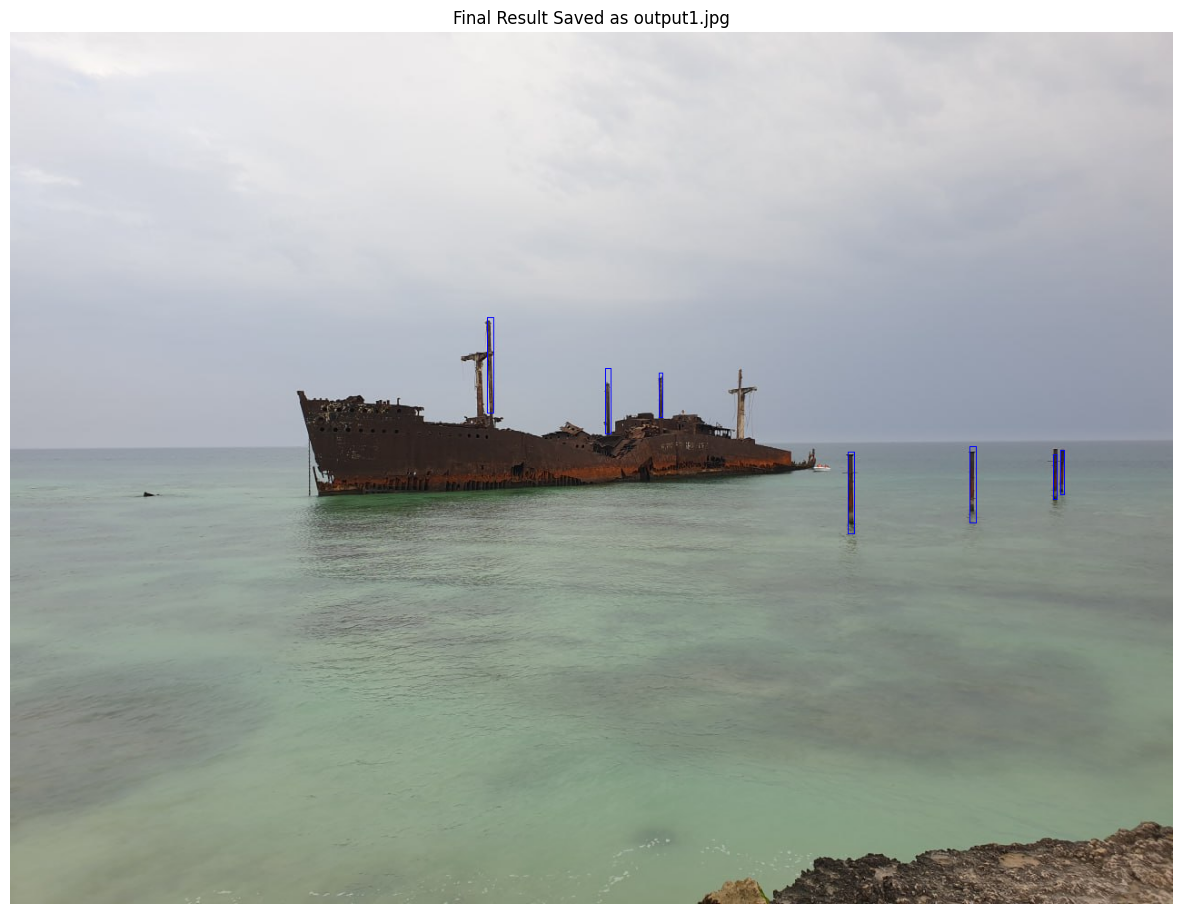

In [ ]:

print("--- شروع اجرای مرحله ۳ ---")
input_image = cv2.imread('input.jpg')
template_image = cv2.imread('Brf4.png')
if input_image is None or template_image is None:
    raise FileNotFoundError("فایل 'input.jpg' یا 'temple.png' پیدا نشد.")
print("\nفراخوانی find_template...")
generated_mask = find_template(input_image, template_image)
print("\nفراخوانی draw_bars...")
draw_bars(input_image, template_image, generated_mask)
output_filename = 'output1.jpg'
cv2.imwrite(output_filename, input_image)
print(f"\n✅ نتیجه نهایی با موفقیت در فایل '{output_filename}' ذخیره شد.")
print("نمایش نتیجه ذخیره شده...")
plt.figure(figsize=(15, 12))
plt.title('Final Result Saved as output1.jpg')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## Section 2: Image Completion

We will study and implement two methods for image completion.

### Method 1: Texture Synthesis

One way to complete a removed part of an image is to try regenerating the texture of its near pixels to cover it using texture synthesis. Texture synthesis is the process of constructing a large digital image from a small digital sample image by taking advantage of its structural content.

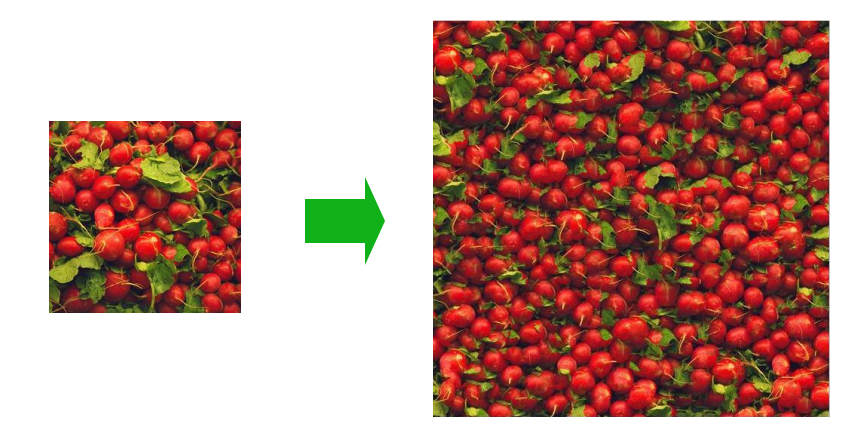

The method we are going to implement is based on the following paper:

 https://people.eecs.berkeley.edu/~efros/research/quilting/quilting.pdf

Complete the following function to apply texture synthesis to generate a larger image (with shape `result_shape`) with the given texture. `patch_size` indicated the size of the patch covered in each iteration. `overlap` is an integer indicating the number of overlaping pixels between any two patches.

**Note:** To avoid complicating this function, you may need to implement other helper functions and use them. implement them in the next cell.


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import random
import math
import cv2
from tqdm.notebook import tqdm

In [4]:
def ssd(p1, p2):
       return np.sum((p1 - p2)**2)

def find_min_cut_path(errors):

    dp = np.zeros_like(errors, dtype=np.float64)
    dp[0, :] = errors[0, :]
    for i in range(1, errors.shape[0]):
        for j in range(errors.shape[1]):
            prev_min = dp[i-1, j]
            if j > 0:
                prev_min = min(prev_min, dp[i-1, j-1])
            if j < errors.shape[1] - 1:
                prev_min = min(prev_min, dp[i-1, j+1])
            dp[i, j] = errors[i, j] + prev_min
    path = np.zeros(errors.shape[0], dtype=int)
    path[-1] = np.argmin(dp[-1, :])
    for i in range(errors.shape[0] - 2, -1, -1):
        j = path[i+1]
        options = {dp[i, k]: k for k in range(max(0, j-1), min(errors.shape[1], j+2))}
        path[i] = options[min(options.keys())]
    return path

def find_matching_patches_fast(texture, result, y, x, patch_size, overlap, search_fraction=0.15):

    target = result[y : y + patch_size, x : x + patch_size]
    h_tex, w_tex, _ = texture.shape
    errors = []
    has_top_overlap = y > 0
    has_left_overlap = x > 0
    all_coords = [(i, j) for i in range(h_tex - patch_size + 1) for j in range(w_tex - patch_size + 1)]
    num_samples = max(1, int(len(all_coords) * search_fraction))
    sample_coords = random.sample(all_coords, num_samples)
    for i, j in sample_coords:
        current_error = 0
        source = texture[i : i + patch_size, j : j + patch_size]
        if has_top_overlap:
            current_error += ssd(source[0:overlap, :], target[0:overlap, :])
        if has_left_overlap:
            current_error += ssd(source[:, 0:overlap], target[:, 0:overlap])
        errors.append((current_error, (i, j)))
    min_error = min(e for e, p in errors)
    tolerance = min_error * 1.1
    best_patches_coords = [p for e, p in errors if e <= tolerance]
    return random.choice(best_patches_coords)

In [5]:
def apply_texture_synthesis(texture: np.ndarray, result_shape: tuple, patch_size: int, overlap: int):
  
    h_target, w_target, channels = result_shape
    step = patch_size - overlap
    num_steps_h = math.ceil((h_target - patch_size) / step)
    num_steps_w = math.ceil((w_target - patch_size) / step)
    h_padded = num_steps_h * step + patch_size
    w_padded = num_steps_w * step + patch_size
    padded_shape = (h_padded, w_padded, channels)

    result = np.zeros(padded_shape, dtype=np.float64)
    h_tex, w_tex, _ = texture.shape
    rand_y, rand_x = random.randint(0, h_tex - patch_size), random.randint(0, w_tex - patch_size)
    result[0:patch_size, 0:patch_size] = texture[rand_y : rand_y + patch_size, rand_x : rand_x + patch_size]

    for y in tqdm(range(0, h_padded - patch_size + 1, step), desc="Synthesizing Rows (CPU)"):
        for x in range(0, w_padded - patch_size + 1, step):
            if y == 0 and x == 0: continue
            py, px = find_matching_patches_fast(texture, result, y, x, patch_size, overlap)
            new_patch = texture[py:py+patch_size, px:px+patch_size]
            existing_patch = result[y:y+patch_size, x:x+patch_size]
            mask = np.ones_like(new_patch, dtype=np.float64)
            if y > 0:
                errors = np.sum((new_patch[0:overlap, :] - existing_patch[0:overlap, :])**2, axis=2)
                path = find_min_cut_path(errors.T)
                h_mask = np.zeros((overlap, patch_size))
                for j in range(patch_size): h_mask[path[j]:, j] = 1
                mask[0:overlap, :] = np.stack([h_mask] * channels, axis=-1)
            if x > 0:
                errors = np.sum((new_patch[:, 0:overlap] - existing_patch[:, 0:overlap])**2, axis=2)
                path = find_min_cut_path(errors)
                v_mask = np.zeros((patch_size, overlap))
                for i in range(patch_size): v_mask[i, path[i]:] = 1
                v_mask_3d = np.stack([v_mask] * channels, axis=-1)
                if y > 0: mask[:, 0:overlap] *= v_mask_3d
                else: mask[:, 0:overlap] = v_mask_3d
            result[y:y+patch_size, x:x+patch_size] = (new_patch * mask) + (existing_patch * (1 - mask))

    final_result = result[0:h_target, 0:w_target]
    return np.clip(final_result * 255, 0, 255).astype(np.uint8)

Apply this function on `texture1.jpg`, `texture2.jpg` and `texture3.jpg` and save the results as `output-synthesis1.jpg`, `output-synthesis2.jpg` and `output-synthesis3.jpg`, respectively. Dimension of the results should be $2400 \times 2400$. You can choose `patch_size` and `overlap` properly to get the best result. Your score on this part depends on the quality of the results.

In [ ]:


print("Please upload texture1.jpg, texture2.jpg, and texture3.jpg")
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Please upload texture1.jpg, texture2.jpg, and texture3.jpg


Saving texture1.jpg to texture1.jpg
,Saving texture2.jpg to texture2.jpg
,Saving texture3.jpg to texture3.jpg
,User uploaded file "texture1.jpg" with length 603936 bytes
,User uploaded file "texture2.jpg" with length 33995 bytes
,User uploaded file "texture3.jpg" with length 19011 bytes


Starting CPU texture synthesis process...
,----------------------------------------
,▶️ Processing 'texture1.jpg'...
,   Resizing input texture for faster processing...


Synthesizing Rows (CPU):   0%|          | 0/24 [00:00<?, ?it/s]

✅ Result successfully saved to 'output-synthesis1.jpg'!
,🖼️ Displaying result for 'output-synthesis1.jpg'...


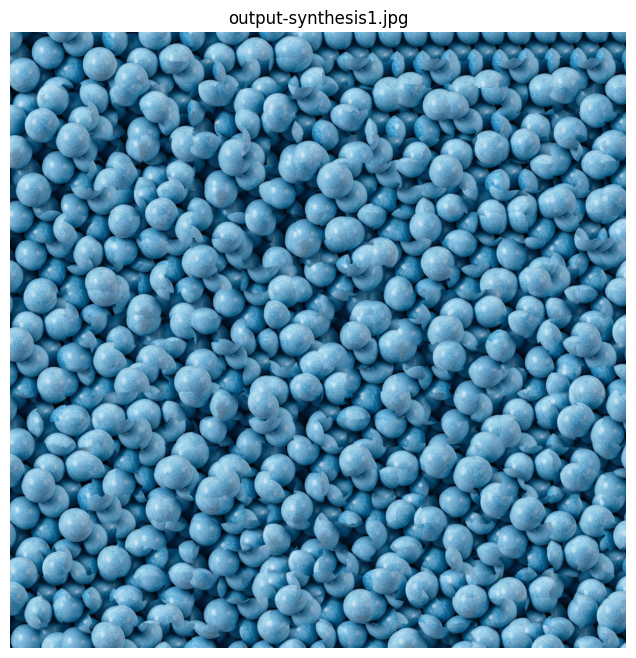

----------------------------------------
,▶️ Processing 'texture2.jpg'...
,   Resizing input texture for faster processing...


Synthesizing Rows (CPU):   0%|          | 0/24 [00:00<?, ?it/s]

✅ Result successfully saved to 'output-synthesis2.jpg'!
,🖼️ Displaying result for 'output-synthesis2.jpg'...


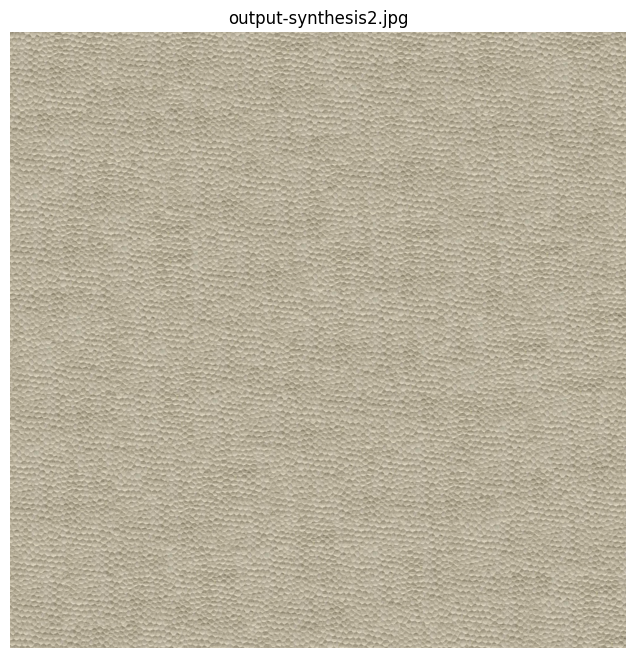

----------------------------------------
,▶️ Processing 'texture3.jpg'...
,   Resizing input texture for faster processing...


Synthesizing Rows (CPU):   0%|          | 0/24 [00:00<?, ?it/s]

✅ Result successfully saved to 'output-synthesis3.jpg'!
,🖼️ Displaying result for 'output-synthesis3.jpg'...


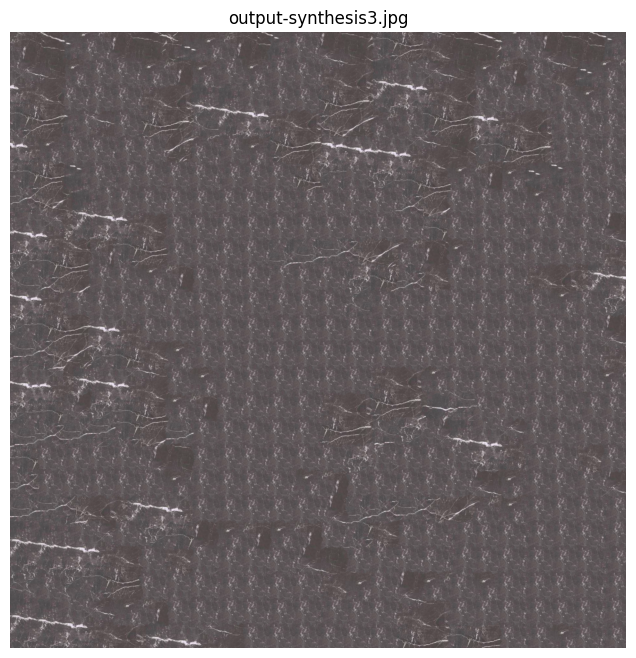

----------------------------------------
,🎉 All textures have been processed on the CPU.


In [ ]:


textures_to_process = [
    {'input': 'texture1.jpg', 'output': 'output-synthesis1.jpg'},
    {'input': 'texture2.jpg', 'output': 'output-synthesis2.jpg'},
    {'input': 'texture3.jpg', 'output': 'output-synthesis3.jpg'}
]
PATCH_SIZE = 120
OVERLAP = 20
RESULT_SHAPE = (2400, 2400)

print("Starting CPU texture synthesis process...")
print("-" * 40)
for config in textures_to_process:
    input_file, output_file = config['input'], config['output']
    if not os.path.exists(input_file):
        print(f"⚠️ Warning: Input file '{input_file}' not found. Skipping.")
        continue
    print(f"▶️ Processing '{input_file}'...")

    texture_cpu = mpimg.imread(input_file)
    print("   Resizing input texture for faster processing...")
    texture_cpu = cv2.resize(texture_cpu, (500, 500), interpolation=cv2.INTER_AREA)
    texture_cpu = texture_cpu.astype(float)
    texture_cpu = texture_cpu / texture_cpu.max()

    full_result_shape = (RESULT_SHAPE[0], RESULT_SHAPE[1], texture_cpu.shape[2])
    synthesised_image = apply_texture_synthesis(texture_cpu, full_result_shape, PATCH_SIZE, OVERLAP)
    plt.imsave(output_file, synthesised_image)
    print(f"✅ Result successfully saved to '{output_file}'!")
    print(f"🖼️ Displaying result for '{output_file}'...")
    plt.figure(figsize=(8, 8))
    plt.imshow(synthesised_image)
    plt.title(output_file)
    plt.axis('off')
    plt.show()

    print("-" * 40)

print("🎉 All textures have been processed on the CPU.")

### Method 2: Patch Match

**Patch Match** is a method for image inpainting introduced in the following work:

Website: https://gfx.cs.princeton.edu/pubs/Barnes_2009_PAR/index.php

Paper: https://gfx.cs.princeton.edu/pubs/Barnes_2009_PAR/patchmatch.pdf


Implement the following function to apply patch match on image `A` from image `B`:

In [ ]:
import cv2
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from tqdm import tqdm 


In [ ]:


@jit(nopython=True)
def init_nnf(A, B, patch_size):
   
    height_A, width_A, _ = A.shape
    height_B, width_B, _ = B.shape
    nnf = np.zeros((height_A, width_A, 2), dtype=np.int32)
    max_y_B = height_B - patch_size
    max_x_B = width_B - patch_size
    nnf[:, :, 0] = np.random.randint(0, max_y_B + 1, size=(height_A, width_A))
    nnf[:, :, 1] = np.random.randint(0, max_x_B + 1, size=(height_A, width_A))
    return nnf

@jit(nopython=True)
def calc_dist(A, B, pA_y, pA_x, pB_y, pB_x, patch_size):
   
    patch_A = A[pA_y : pA_y + patch_size, pA_x : pA_x + patch_size]
    patch_B = B[pB_y : pB_y + patch_size, pB_x : pB_x + patch_size]
    return np.sum((patch_A - patch_B)**2)


In [6]:

@jit(nopython=True)
def perform_patch_match(A, B, patch_size, iterations=4):
    
    height_A, width_A, _ = A.shape
    height_B, width_B, _ = B.shape
    nnf = init_nnf(A, B, patch_size)
    nnf_dist = np.full((height_A, width_A), np.inf, dtype=np.float64)
    max_y_A, max_x_A = height_A - patch_size, width_A - patch_size
    max_y_B, max_x_B = height_B - patch_size, width_B - patch_size

    for y in range(max_y_A + 1):
        for x in range(max_x_A + 1):
            pB_y, pB_x = nnf[y, x]
            nnf_dist[y, x] = calc_dist(A, B, y, x, pB_y, pB_x, patch_size)

    search_radius = max(width_B, height_B)
    alpha = 0.5
    
    for it in range(iterations):
        y_range = range(max_y_A + 1) if it % 2 == 0 else range(max_y_A, -1, -1)
        x_range = range(max_x_A + 1) if it % 2 == 0 else range(max_x_A, -1, -1)

        for y_A in y_range:
            for x_A in x_range:
                current_pB_y, current_pB_x = nnf[y_A, x_A]
                current_dist = nnf_dist[y_A, x_A]
                
                neighbors = [(-1, 0), (0, -1)] if it % 2 == 0 else [(1, 0), (0, 1)]
                for dy, dx in neighbors:
                    ny, nx = y_A + dy, x_A + dx
                    if 0 <= ny <= max_y_A and 0 <= nx <= max_x_A:
                        pB_y_n, pB_x_n = nnf[ny, nx]
                        cand_pB_y, cand_pB_x = pB_y_n - dy, pB_x_n - dx
                        if 0 <= cand_pB_y <= max_y_B and 0 <= cand_pB_x <= max_x_B:
                            dist = calc_dist(A, B, y_A, x_A, cand_pB_y, cand_pB_x, patch_size)
                            if dist < current_dist:
                                current_dist, current_pB_y, current_pB_x = dist, cand_pB_y, cand_pB_x
                
                rand_y_offset = int((np.random.random() * 2 - 1) * search_radius)
                rand_x_offset = int((np.random.random() * 2 - 1) * search_radius)
                cand_pB_y = max(0, min(current_pB_y + rand_y_offset, max_y_B))
                cand_pB_x = max(0, min(current_pB_x + rand_x_offset, max_x_B))
                dist = calc_dist(A, B, y_A, x_A, cand_pB_y, cand_pB_x, patch_size)
                if dist < current_dist:
                    current_dist, current_pB_y, current_pB_x = dist, cand_pB_y, cand_pB_x

                nnf[y_A, x_A, 0], nnf[y_A, x_A, 1] = current_pB_y, current_pB_x
                nnf_dist[y_A, x_A] = current_dist
        search_radius *= alpha
    return nnf

In [ ]:

@jit(nopython=True)
def reconstruct_from_nnf(nnf, B, patch_size):
    height_A, width_A, _ = nnf.shape
    reconstructed_A = np.zeros((height_A, width_A, B.shape[2]), dtype=np.float32)
    counts = np.zeros((height_A, width_A), dtype=np.int32)
    for y_A in range(height_A - patch_size + 1):
        for x_A in range(width_A - patch_size + 1):
            pB_y, pB_x = nnf[y_A, x_A]
            patch = B[pB_y:pB_y+patch_size, pB_x:pB_x+patch_size]
            reconstructed_A[y_A:y_A+patch_size, x_A:x_A+patch_size] += patch.astype(np.float32)
            counts[y_A:y_A+patch_size, x_A:x_A+patch_size] += 1
    for y in range(height_A):
        for x in range(width_A):
            if counts[y, x] > 0:
                reconstructed_A[y, x] /= counts[y, x]
    
    return reconstructed_A


From `patchmatch-input.jpg`, remove the two boats (you can do it manually) and recover their background using patchmatch. Choose proper parameters to get the best possible result.

Loading image and setting up mask...
,Displaying the masked image for verification...


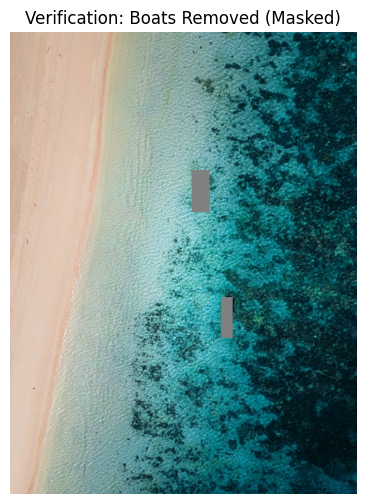


,Mask verification complete.
,Starting the iterative inpainting process now...


Patching Progress: 100%|██████████| 12/12 [15:35<00:00, 77.93s/it]


Inpainting complete.


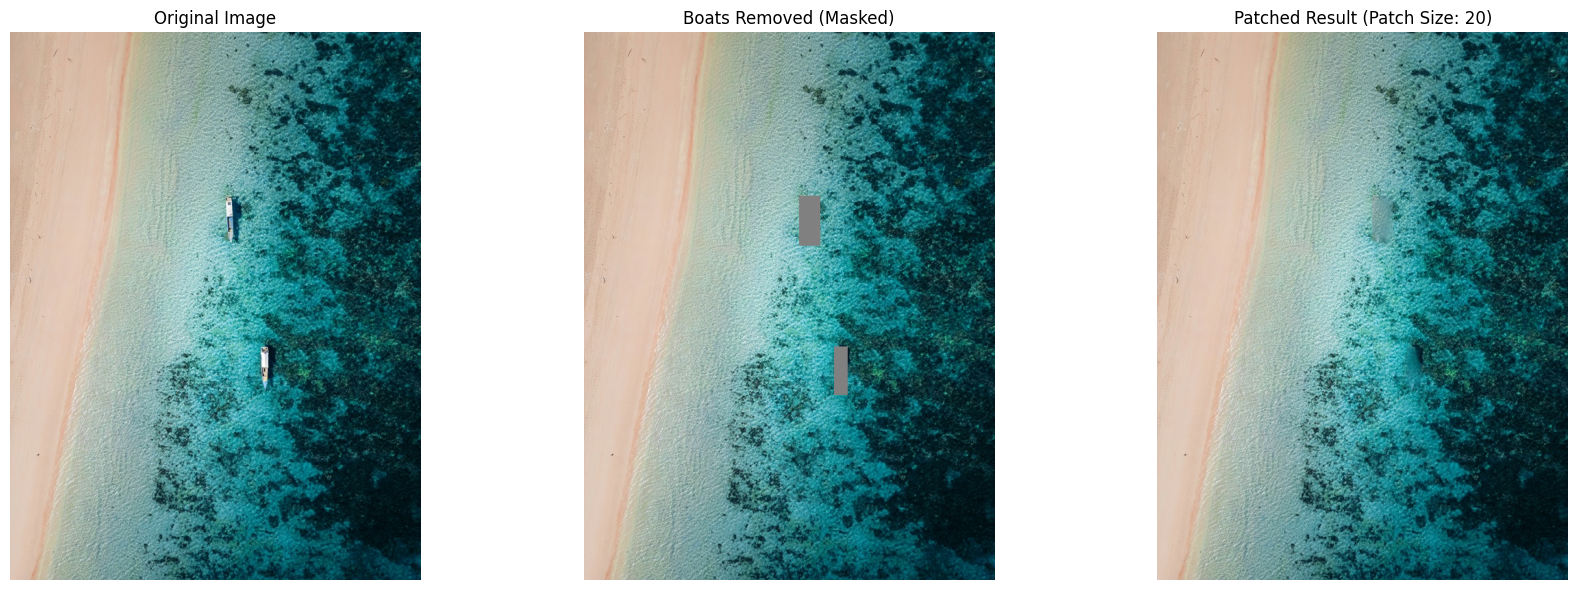

In [ ]:
print("Loading image and setting up mask...")
image_path = 'patchmatch-input.jpg'
original_image = cv2.imread(image_path)
if original_image is None:
    raise FileNotFoundError(f"Error: Could not read image at '{image_path}'. Make sure the file is in the correct directory.")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image_float = original_image.astype(np.float32) / 255.0
mask = np.zeros(original_image.shape[:2], dtype=np.uint8)

TOP_LEFT_BOAT_1 = (3142//10, 2392//10)
BOTTOM_RIGHT_BOAT_1 = (3446//10, 3114//10)

TOP_LEFT_BOAT_2 = (3654//10, 4594//10)
BOTTOM_RIGHT_BOAT_2 = (3846//10, 5293//10)

cv2.rectangle(mask, TOP_LEFT_BOAT_1, BOTTOM_RIGHT_BOAT_1, 1, -1)
cv2.rectangle(mask, TOP_LEFT_BOAT_2, BOTTOM_RIGHT_BOAT_2, 1, -1)


image_with_hole = original_image.copy()
image_with_hole[mask == 1] = [128, 128, 128]

print("Displaying the masked image for verification...")
plt.figure(figsize=(8, 6))
plt.title('Verification: Boats Removed (Masked)')
plt.imshow(image_with_hole)
plt.axis('off')
plt.show()

print("\nMask verification complete.")
print("Starting the iterative inpainting process now...")
current_image = original_image_float.copy()

noise = np.random.rand(current_image.shape[0], current_image.shape[1], current_image.shape[2])
current_image[mask == 1] = noise[mask == 1]


PATCH_SIZE = 20
INPAINT_ITERATIONS = 12

for i in tqdm(range(INPAINT_ITERATIONS), desc="Patching Progress"):

    nnf = perform_patch_match(current_image, original_image_float, PATCH_SIZE, iterations=12)
    reconstructed_image = reconstruct_from_nnf(nnf, original_image_float, PATCH_SIZE)

    current_image[mask == 1] = reconstructed_image[mask == 1]

print("Inpainting complete.")


plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Boats Removed (Masked)')
plt.imshow(image_with_hole)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Patched Result (Patch Size: {PATCH_SIZE})')
plt.imshow(current_image)
plt.axis('off')

plt.tight_layout()
plt.show()


,Starting the process to crop and place patches...
,✅ Patched areas cropped.
,✅ Target image 'patchmatch-input2.jpg' loaded.
,✅ Patches resized and pasted onto the new image.
,Displaying the final composite image...


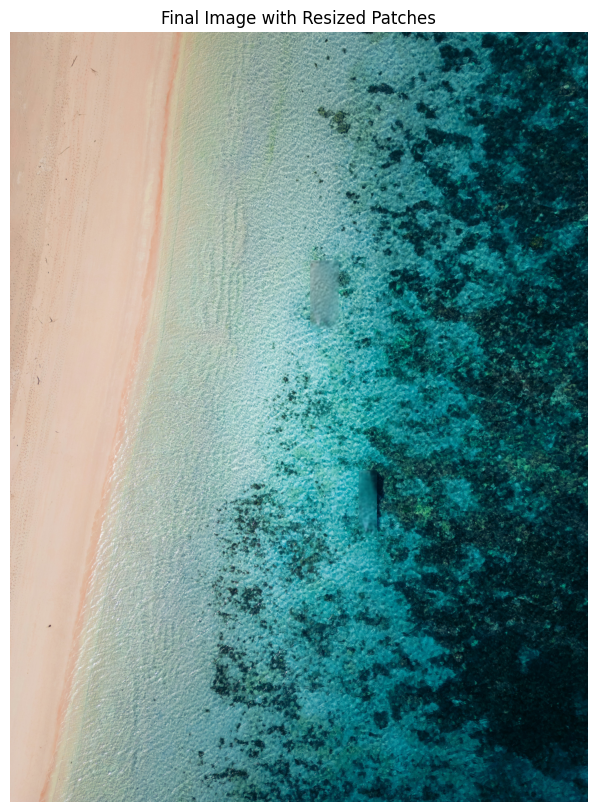

✅ Final image saved as 'final_composite_image.jpg'.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("\nStarting the process to crop and place patches...")

y1_start, y1_end = TOP_LEFT_BOAT_1[1], BOTTOM_RIGHT_BOAT_1[1]
x1_start, x1_end = TOP_LEFT_BOAT_1[0], BOTTOM_RIGHT_BOAT_1[0]
cropped_patch_1 = current_image[y1_start:y1_end, x1_start:x1_end]

y2_start, y2_end = TOP_LEFT_BOAT_2[1], BOTTOM_RIGHT_BOAT_2[1]
x2_start, x2_end = TOP_LEFT_BOAT_2[0], BOTTOM_RIGHT_BOAT_2[0]
cropped_patch_2 = current_image[y2_start:y2_end, x2_start:x2_end]

print("✅ Patched areas cropped.")



target_image_path = 'patchmatch-input2.jpg'
target_image = cv2.imread(target_image_path)

if target_image is None:
    raise FileNotFoundError(f"Error: Could not read the target image at '{target_image_path}'.")

target_image_rgb = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
print(f"✅ Target image '{target_image_path}' loaded.")


h1, w1, _ = cropped_patch_1.shape
new_size_1 = (w1 * 10, h1 * 10) 
resized_patch_1 = cv2.resize(cropped_patch_1, new_size_1, interpolation=cv2.INTER_LINEAR)

patch_to_paste_1 = (resized_patch_1 * 255).astype(np.uint8)

paste_x1 = x1_start * 10
paste_y1 = y1_start * 10

target_image_rgb[paste_y1 : paste_y1 + new_size_1[1], paste_x1 : paste_x1 + new_size_1[0]] = patch_to_paste_1


h2, w2, _ = cropped_patch_2.shape
new_size_2 = (w2 * 10, h2 * 10)
resized_patch_2 = cv2.resize(cropped_patch_2, new_size_2, interpolation=cv2.INTER_LINEAR)
patch_to_paste_2 = (resized_patch_2 * 255).astype(np.uint8)
paste_x2 = x2_start * 10
paste_y2 = y2_start * 10
target_image_rgb[paste_y2 : paste_y2 + new_size_2[1], paste_x2 : paste_x2 + new_size_2[0]] = patch_to_paste_2

print("✅ Patches resized and pasted onto the new image.")



print("Displaying the final composite image...")
plt.figure(figsize=(12, 10))
plt.title('Final Image with Resized Patches')
plt.imshow(target_image_rgb)
plt.axis('off')
plt.show()

final_image_bgr = cv2.cvtColor(target_image_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite('final_composite_image.jpg', final_image_bgr)
print("✅ Final image saved as 'final_composite_image.jpg'.")

## Section 3: Removing Objects and Completing the Image

For the last part, we will use above functions to remove the detected objects from section 1 and complete the initial image.

First, Remove the matched objects from `input.jpg` and plot the result. You may do this by simply setting the intensity of the matched pixels to 0 (or anything else).

--- Starting image preparation for inpainting ---
,
,Calling find_template to get the mask...
,شروع تطبیق الگو با آستانه: 0.7...
,تعداد مطابقت‌های خام: 1099
,تعداد مطابقت‌های نهایی: 7
,[array([714, 375,   3,  48], dtype=int32), array([525, 314,   6, 104], dtype=int32), array([655, 370,   5,  71], dtype=int32), array([1156,  460,    3,   48], dtype=int32), array([1148,  465,    3,   48], dtype=int32), array([1056,  456,    6,   83], dtype=int32), array([922, 462,   6,  89], dtype=int32)]
,
,Finding object coordinates from the mask...
,Found 7 objects to cover.
,
,✅ Image with gray boxes saved successfully as 'output_ready_for_inpainting.jpg'.
,Displaying the result...


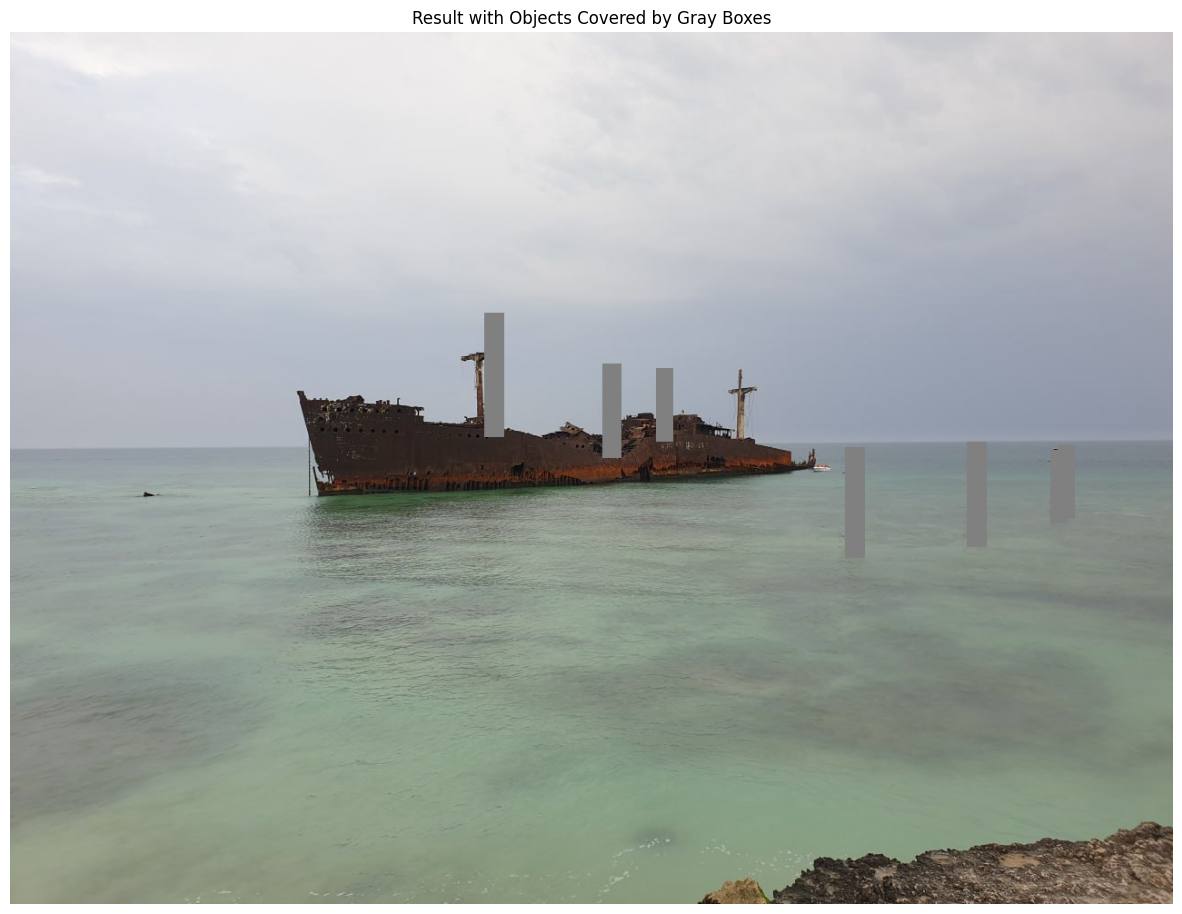

In [ ]:

print("--- Starting image preparation for inpainting ---")


input_image = cv2.imread('input.jpg')

template_image = cv2.imread('Brf4.png')

if input_image is None or template_image is None:
    raise FileNotFoundError("Could not find 'input.jpg' or 'Brf4.png'. Please check the file paths.")

print("\nCalling find_template to get the mask...")
generated_mask = find_template(input_image, template_image)

print("\nFinding object coordinates from the mask...")
contours, _ = cv2.findContours(generated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Found {len(contours)} objects to cover.")

image_with_gray_boxes = input_image.copy()
gray_color = (128, 128, 128) 

for cnt in contours:
   
    x, y, w, h = cv2.boundingRect(cnt)
    
    y_start = max(0, y - 5)
    y_end = min(image_with_gray_boxes.shape[0], y + h + 27)
    x_start = max(0, x-3)
    x_end = min(image_with_gray_boxes.shape[1], x + w + 12)
    
    image_with_gray_boxes[y_start:y_end, x_start:x_end] = gray_color

output_filename = 'output_ready_for_inpainting.jpg'
cv2.imwrite(output_filename, image_with_gray_boxes)
print(f"\n✅ Image with gray boxes saved successfully as '{output_filename}'.")

print("Displaying the result...")
plt.figure(figsize=(15, 12))
plt.title('Result with Objects Covered by Gray Boxes')
plt.imshow(cv2.cvtColor(image_with_gray_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Now, apply texture synthesis or patch match (or both) to complete the removed part of the image. Save the result as `output-complete.jpg`. Your score on this part depends on the qulity of the completed parts.

🚀 Starting iterative inpainting process...


Inpainting Progress: 100%|██████████| 12/12 [31:14<00:00, 156.19s/it]



,Inpainting complete! ✅


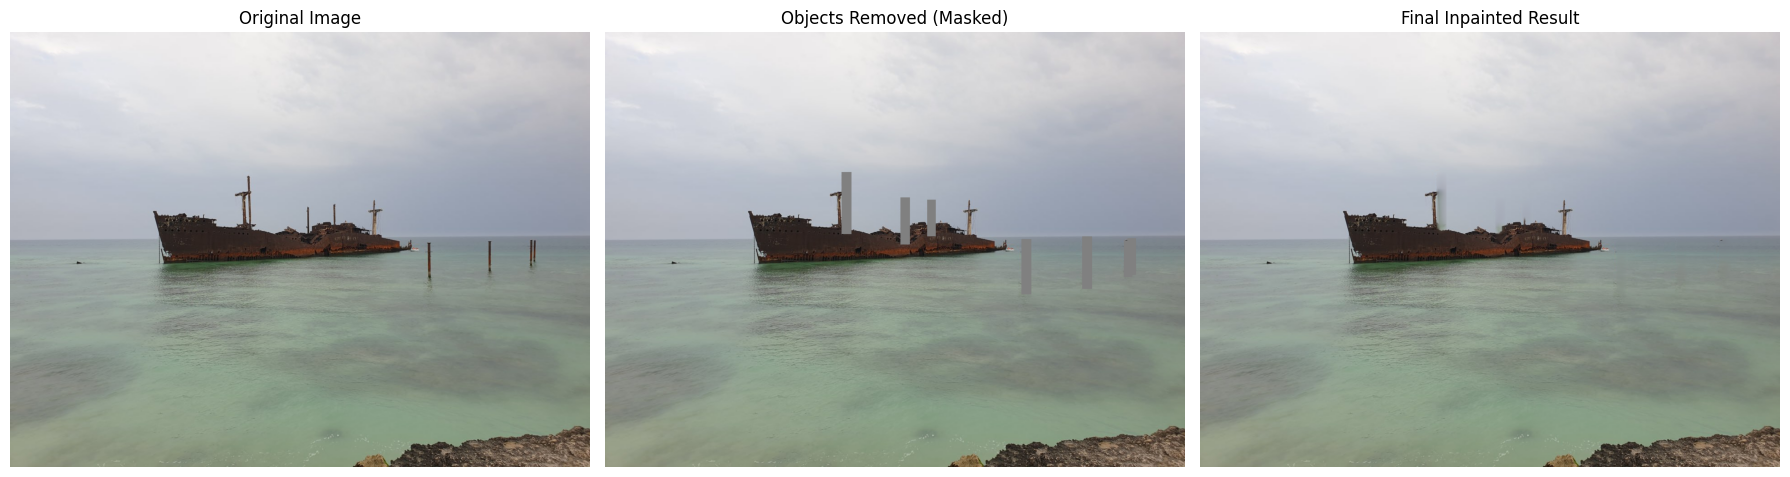

In [ ]:
print("🚀 Starting iterative inpainting process...")


hole_mask = np.all(image_with_gray_boxes == (128, 128, 128), axis=-1)

original_image_float = input_image.astype(np.float32) / 255.0
current_image = original_image_float.copy()

noise = np.random.rand(current_image.shape[0], current_image.shape[1], current_image.shape[2])
current_image[hole_mask] = noise[hole_mask]

PATCH_SIZE = 16
INPAINT_ITERATIONS = 12 
PATCHMATCH_INTERNAL_ITERATIONS = 14


for i in tqdm(range(INPAINT_ITERATIONS), desc="Inpainting Progress"):
    nnf = perform_patch_match(
        current_image,
        original_image_float,
        PATCH_SIZE,
        iterations=PATCHMATCH_INTERNAL_ITERATIONS
    )

    reconstructed_image = reconstruct_from_nnf(nnf, original_image_float, PATCH_SIZE)

    current_image[hole_mask] = reconstructed_image[hole_mask]

print("\nInpainting complete! ✅")


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Objects Removed (Masked)')
plt.imshow(cv2.cvtColor(image_with_gray_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Final Inpainted Result')

final_display_image = cv2.cvtColor(current_image.astype(np.float32), cv2.COLOR_BGR2RGB)
plt.imshow(np.clip(final_display_image, 0, 1)) 
plt.axis('off')

plt.tight_layout()
plt.show()